# 1.- Entendiendo el problema

#### **Descripción**

El conjunto de datos de vivienda de Boston, es un conjunto de datos clásico para problemas de regresión. Este conjunto de datos contiene información recopilada por el Servicio de Censos de EE. UU. sobre diversas características de viviendas en distintos vecindarios de Boston en la década de 1970. El objetivo principal es predecir el valor medio de las viviendas en esos vecindarios.

#### **<u>Tenemos las siguientes caracteristicas:</u>**

**CRIM:** Tasa de criminalidad per cápita por ciudad

**ZN:** Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

**INDUS:** Proporción de acres de negocios no minoristas por ciudad.

**CHAS:** Variable ficticia del río Charles (1 si el sector limita con el río; 0 en caso contrario)

**NOX:** Concentración de óxidos nitrosos (partes por 10 millones)

**RM:** Número promedio de habitaciones por vivienda

**AGE:** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940

**DIS:** Distancias ponderadas a cinco centros de empleo de Boston

**RAD:** Índice de accesibilidad a autopistas radiales

**TAX:** Tasa de impuesto a la propiedad de valor total por cada 10,000

**PTRATIO:** Relacion alumno-profesor por ciudad

**B:** 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de raza negra por ciudad

**LSTAT:** % de estado socioeconómico más bajo de la población

**MEDV:** Valor mediano de las viviendas ocupadas por sus propietarios en 1000's

# 2.- Analisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/the-boston-housing-dataset/boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.rename({
    'CRIM':'Criminalidad',
    'ZN': 'Terreno recidencial',
    'INDUS': 'Comercio',
    'CHAS': 'Cerca del rio',
    'NOX': 'Contaminación',
    'RM': 'Nº habitaciones',
    'AGE': 'Edad',
    'DIS': 'Dis. centro empleo',
    'RAD': 'Carretera Princ.',
    'TAX': 'Impuestos',
    'PTRATIO': 'Prop. alumno/maestro',
    'B': 'Proporcion de negros',
    'LSTAT': 'Prop. bajos recursos',
    'MEDV': 'Precio',
},axis=1, inplace=True)

In [10]:
df.isna().sum()

Criminalidad            0
Terreno recidencial     0
Comercio                0
Cerca del rio           0
Contaminación           0
Nº habitaciones         0
Edad                    0
Dis. centro empleo      0
Carretera Princ.        0
Impuestos               0
Prop. alumno/maestro    0
Proporcion de negros    0
Prop. bajos recursos    0
Precio                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.isin([np.inf, -np.inf]).sum()

Criminalidad            0
Terreno recidencial     0
Comercio                0
Cerca del rio           0
Contaminación           0
Nº habitaciones         0
Edad                    0
Dis. centro empleo      0
Carretera Princ.        0
Impuestos               0
Prop. alumno/maestro    0
Proporcion de negros    0
Prop. bajos recursos    0
Precio                  0
dtype: int64

In [13]:
df.corr()['Precio'].sort_values(ascending=False)

Precio                  1.000000
Nº habitaciones         0.695360
Terreno recidencial     0.360445
Proporcion de negros    0.333461
Dis. centro empleo      0.249929
Cerca del rio           0.175260
Edad                   -0.376955
Carretera Princ.       -0.381626
Criminalidad           -0.388305
Contaminación          -0.427321
Impuestos              -0.468536
Comercio               -0.483725
Prop. alumno/maestro   -0.507787
Prop. bajos recursos   -0.737663
Name: Precio, dtype: float64

In [14]:
df.head()

,Criminalidad,Terreno recidencial,Comercio,Cerca del rio,Contaminación,Nº habitaciones,Edad,Dis. centro empleo,Carretera Princ.,Impuestos,Prop. alumno/maestro,Proporcion de negros,Prop. bajos recursos,Precio
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Analisis univariado

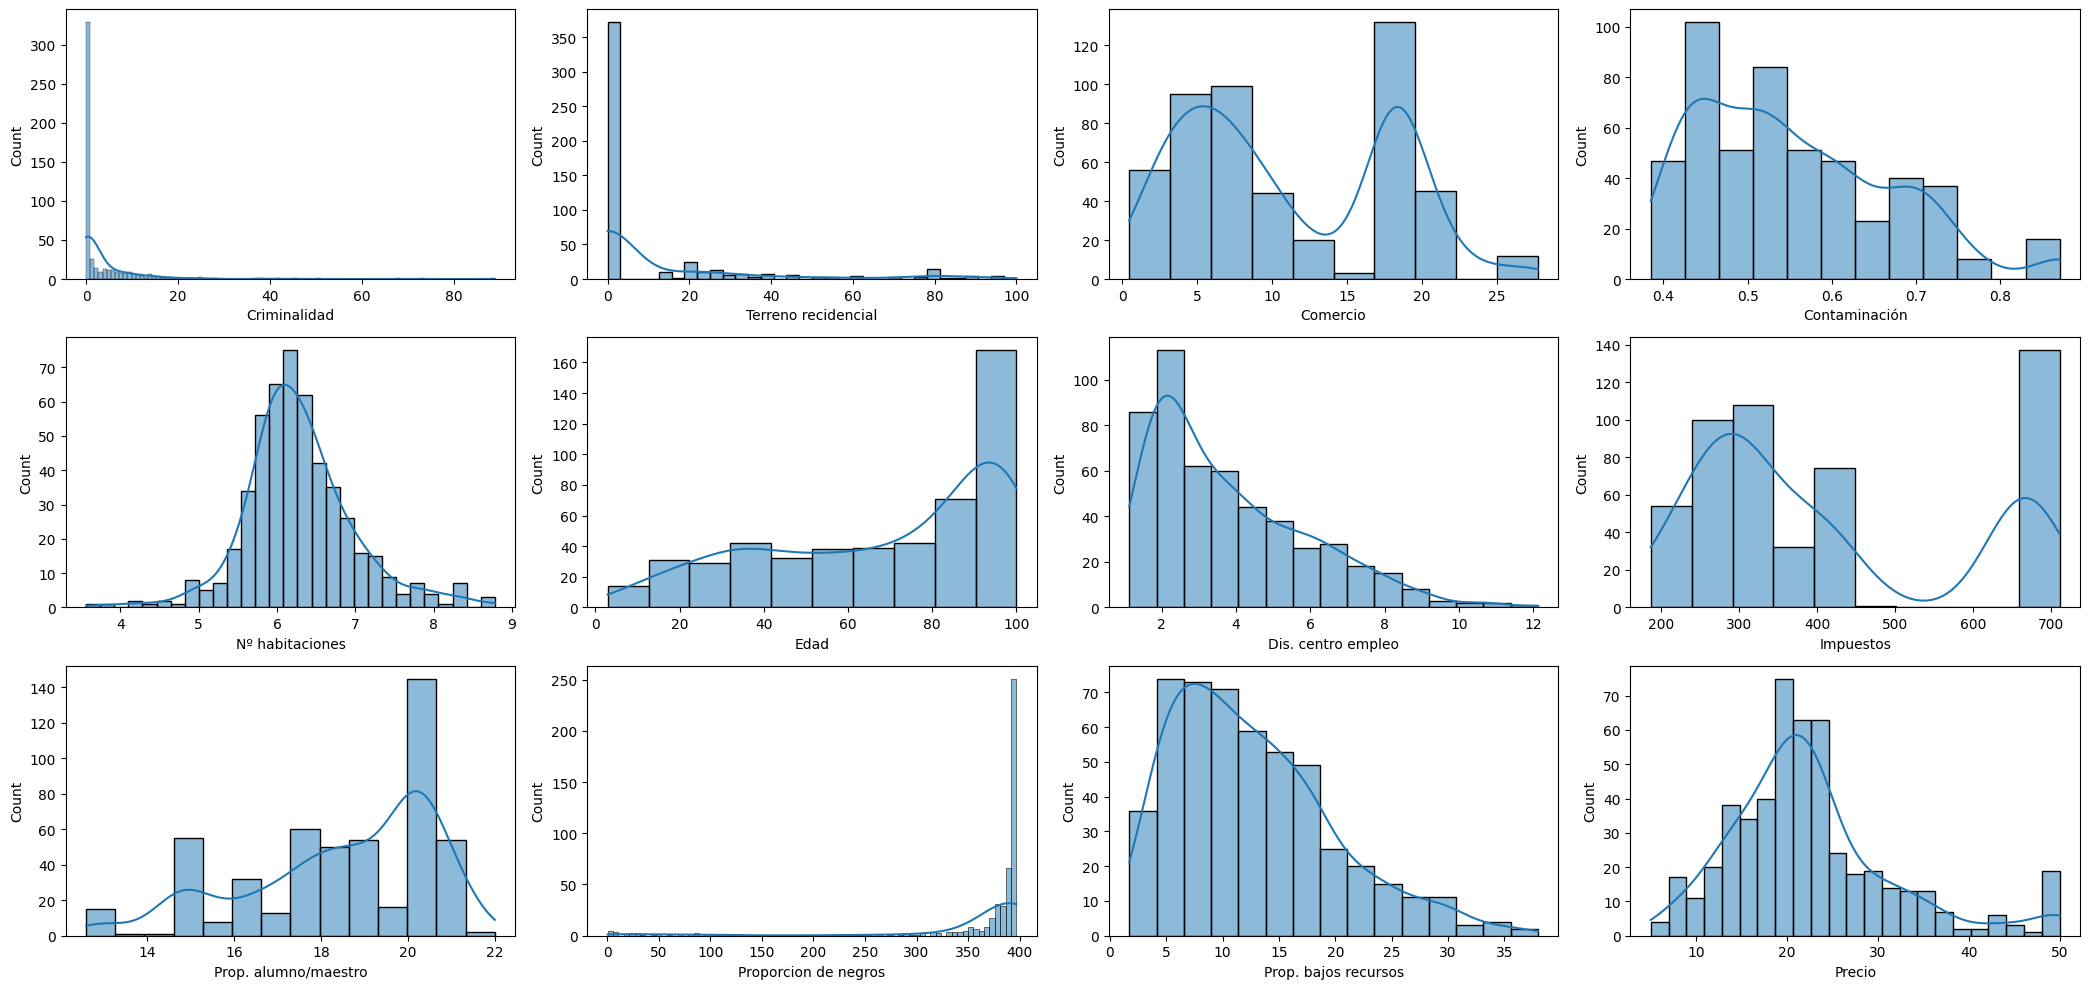

In [16]:
hist_df = ['Criminalidad', 'Terreno recidencial', 'Comercio', 'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo', 'Impuestos', 'Prop. alumno/maestro','Proporcion de negros', 'Prop. bajos recursos', 'Precio']

plt.figure(figsize=(21, 10), dpi=100)

for i, columna in enumerate(hist_df, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna, kde=True)
    
    plt.tight_layout()

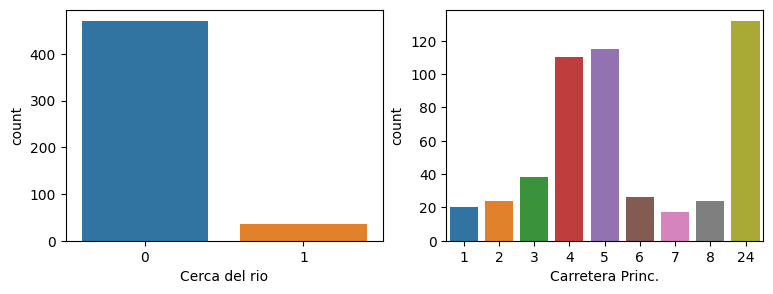

In [17]:
count_df = ['Cerca del rio', 'Carretera Princ.']

plt.figure(figsize=(9, 3))

for i, columna in enumerate(count_df, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=columna)

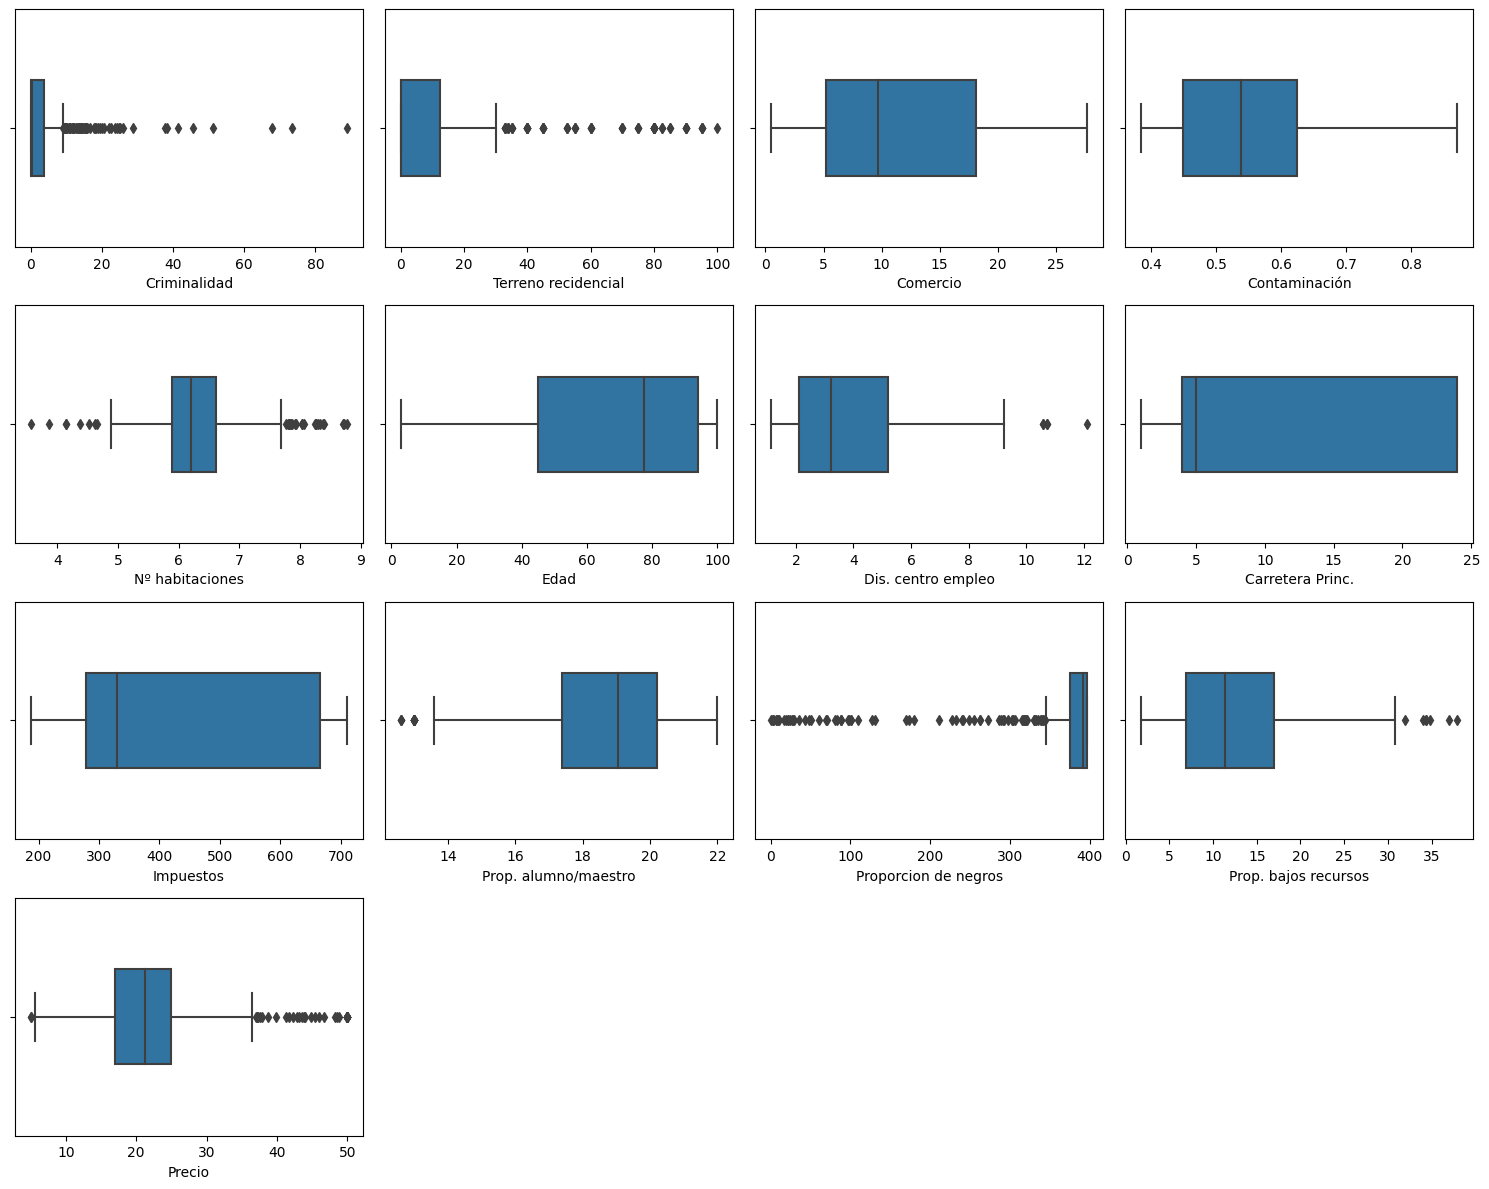

In [18]:
box_df = ['Criminalidad', 'Terreno recidencial', 'Comercio',
       'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo',
       'Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro',
       'Proporcion de negros', 'Prop. bajos recursos', 'Precio']

plt.figure(figsize=(15, 12), dpi=100)

for i, columna in enumerate(box_df, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=columna, width=0.4)
    
    plt.tight_layout()

## Análisis bivariado

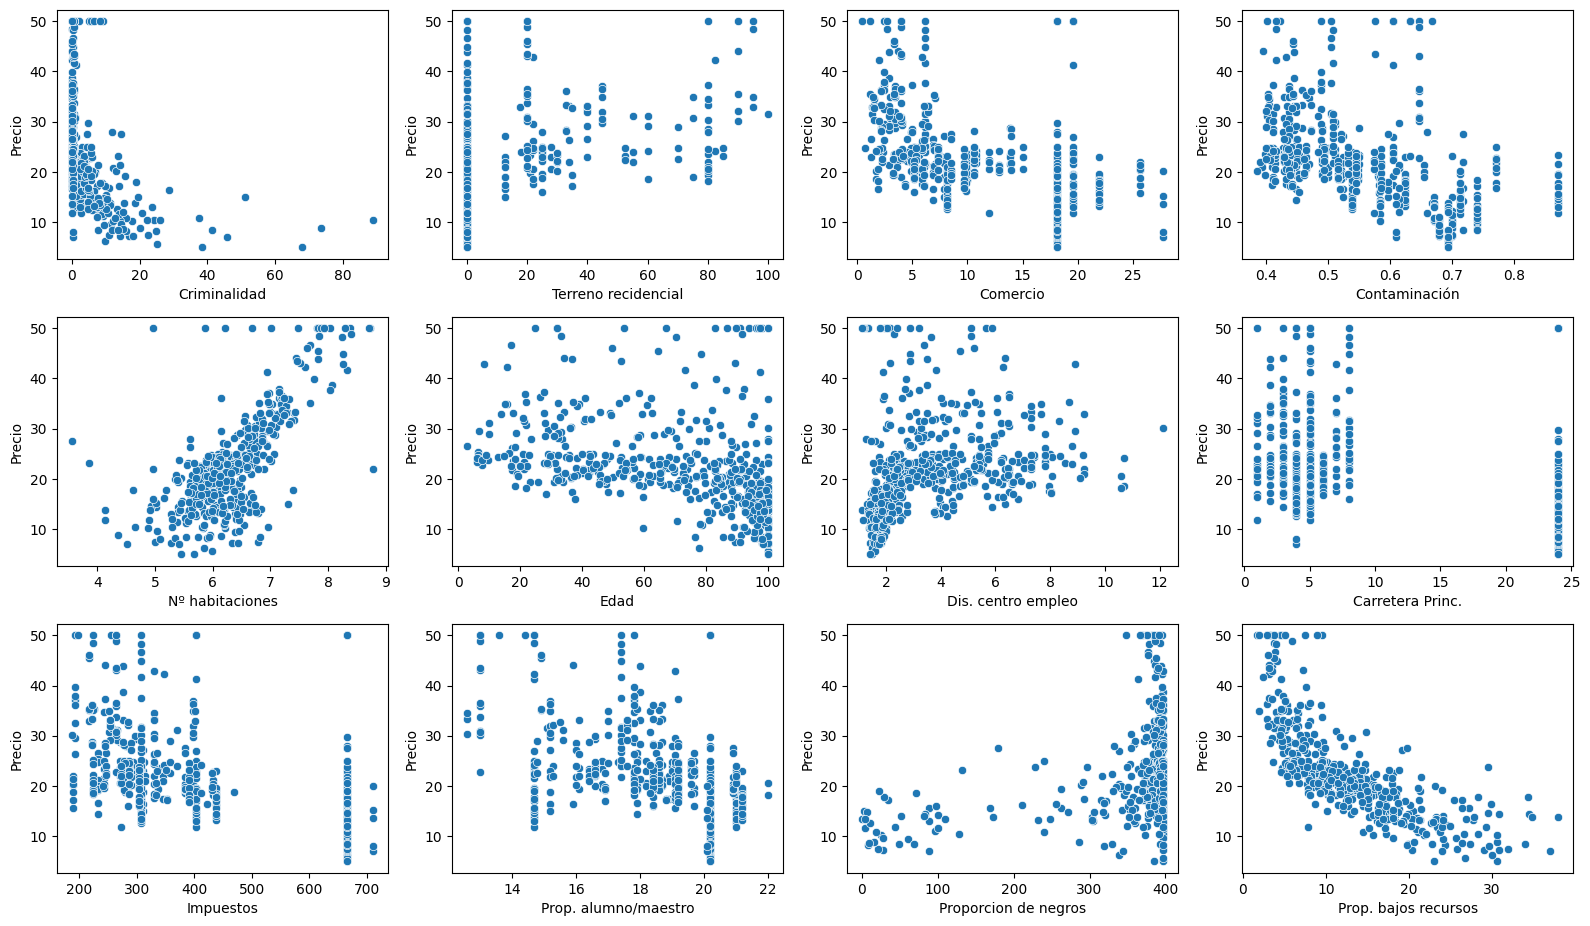

In [19]:
scatter_df = ['Criminalidad', 'Terreno recidencial', 'Comercio','Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo','Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro','Proporcion de negros', 'Prop. bajos recursos']

plt.figure(figsize=(16, 12))

for i, columna in enumerate(scatter_df, start=1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=columna, y='Precio')
    
    plt.tight_layout()

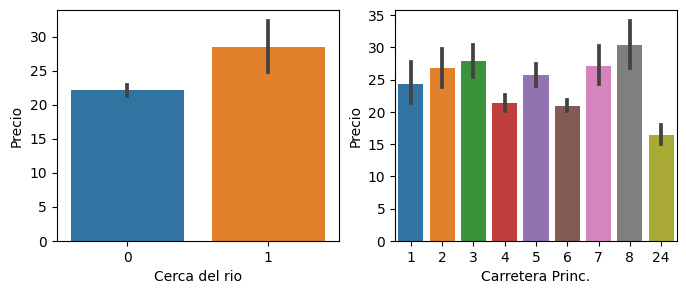

In [20]:
bar_df = ['Cerca del rio', 'Carretera Princ.']

plt.figure(figsize=(8, 3))

for i, columna in enumerate(bar_df, start=1):
    plt.subplot(1, 2, i)
    sns.barplot(data=df, x=columna, y='Precio')

<Axes: >

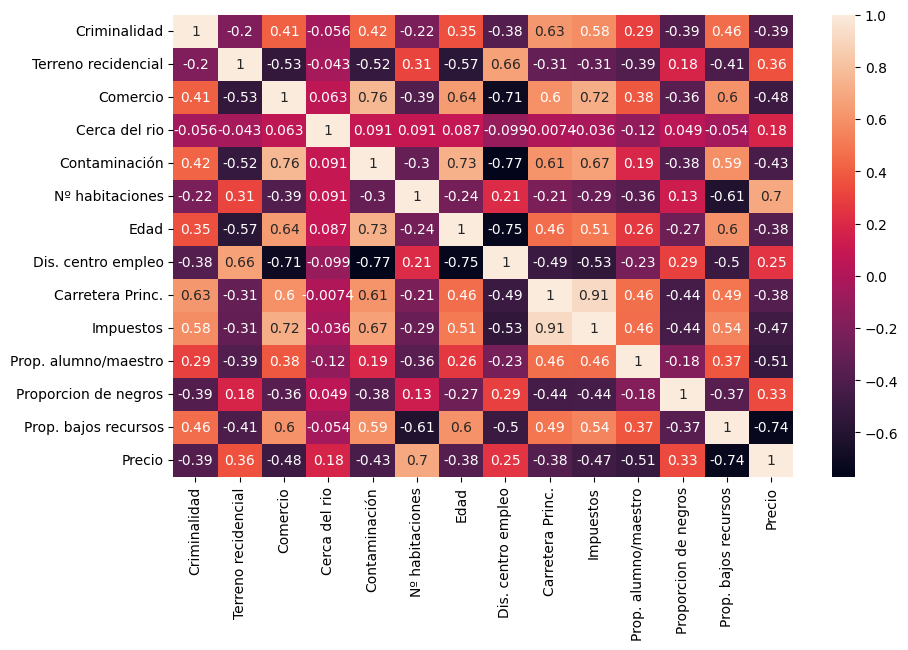

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True)

## Conclusiones
* Parece que tenemos muchos valores extremos que tenecomos que recortar
* carretera principal y impuestos estan altamente correlacionados y puede que tengamos que eliminar uno de los dos

## Limpieza

In [22]:
# por comodidad y efectos practicos he decidido eliminar las columnas criminalidad y terreno recidencial
# ya que tienen 0 extremos que no sabemos el contexto

df = df.drop(['Criminalidad', 'Terreno recidencial'], axis=1)
df.head()

,Comercio,Cerca del rio,Contaminación,Nº habitaciones,Edad,Dis. centro empleo,Carretera Princ.,Impuestos,Prop. alumno/maestro,Proporcion de negros,Prop. bajos recursos,Precio
0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
inf_dis = 0
sup_dis = 9

inf_alum = 15
sup_alum = 22

inf_neg = 350
sup_neg = 400

inf_rec = 0
sup_rec = 31

In [24]:
df['Dis. centro empleo'] = df['Dis. centro empleo'].clip(lower=inf_dis, upper=sup_dis)
df['Prop. alumno/maestro'] = df['Prop. alumno/maestro'].clip(lower=inf_alum, upper=sup_alum)
df['Proporcion de negros'] = df['Proporcion de negros'].clip(lower= inf_neg, upper=sup_neg)
df['Prop. bajos recursos']= df['Prop. bajos recursos'].clip(lower=inf_rec, upper=sup_rec)

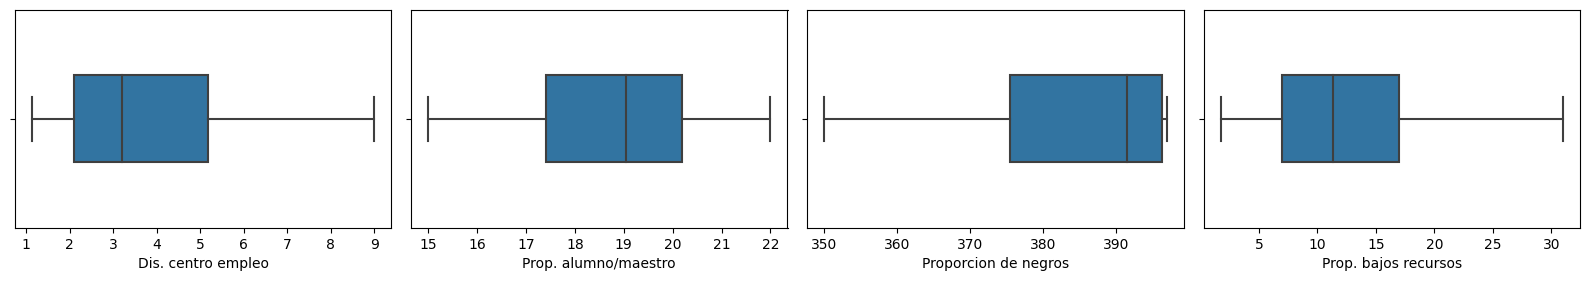

In [25]:
df_atip = ['Dis. centro empleo', 'Prop. alumno/maestro', 'Proporcion de negros', 'Prop. bajos recursos']

plt.figure(figsize=(16, 8), dpi=100)

for i, columna in enumerate(df_atip, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=columna, width=0.4)
    plt.tight_layout()

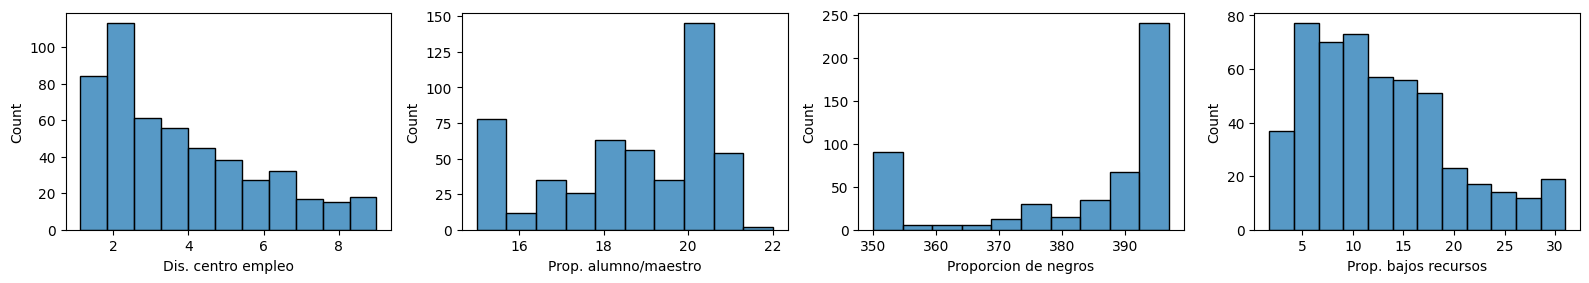

In [26]:
df_atip = ['Dis. centro empleo', 'Prop. alumno/maestro', 'Proporcion de negros', 'Prop. bajos recursos']

plt.figure(figsize=(16, 8), dpi=100)

for i, columna in enumerate(df_atip, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna)
    plt.tight_layout()

# 3.- División del dataset

In [27]:
x = df.drop('Precio', axis=1)
y = df['Precio']

# 4.- Preprocesamiento 

### Creacion del pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [29]:
x_prep = pipeline.fit_transform(x)

In [30]:
x_prep = pd.DataFrame(x_prep, columns=x.columns, index=x.index)

In [31]:
x_prep.head()

,Comercio,Cerca del rio,Contaminación,Nº habitaciones,Edad,Dis. centro empleo,Carretera Princ.,Impuestos,Prop. alumno/maestro,Proporcion de negros,Prop. bajos recursos
0,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699


# 5.- Entrenamiento

In [32]:
scores_col = []
mejores_parametros_col = []
modelo_col = []

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

modelos = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}),
    ('Lasso Regression', Lasso(), {'alpha': [0.1, 1.0, 10.0], 'max_iter': [1000, 1500, 2000, 2500, 3000]}),
    ('Decision Tree Regression', DecisionTreeRegressor(), {'max_depth': [None, 5, 6, 8, 10], 'min_samples_split': [2, 5, 10]})
]


In [34]:
from sklearn.model_selection import KFold, GridSearchCV

for nombre, modelo, parametros in modelos:
  
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=KFold(n_splits=5))
    
    grid_search.fit(x_prep, y)

    scores_col.append(grid_search.best_score_)
    mejores_parametros_col.append(grid_search.best_params_)
    modelo_col.append(nombre)

# 6.- Evaluación y selección 

In [35]:
results_df = pd.DataFrame({
    'Modelo': modelo_col,
    'Score_mse' : scores_col,
    'Mejores Parámetros': mejores_parametros_col,
})

In [36]:
results_df

,Modelo,Score_mse,Mejores Parámetros
0,Linear Regression,0.343342,{}
1,Ridge Regression,0.398423,"{'alpha': 10.0, 'solver': 'sag'}"
2,Lasso Regression,0.401719,"{'alpha': 0.1, 'max_iter': 1000}"
3,Decision Tree Regression,0.192496,"{'max_depth': 5, 'min_samples_split': 2}"


<Axes: xlabel='Score_mse', ylabel='Modelo'>

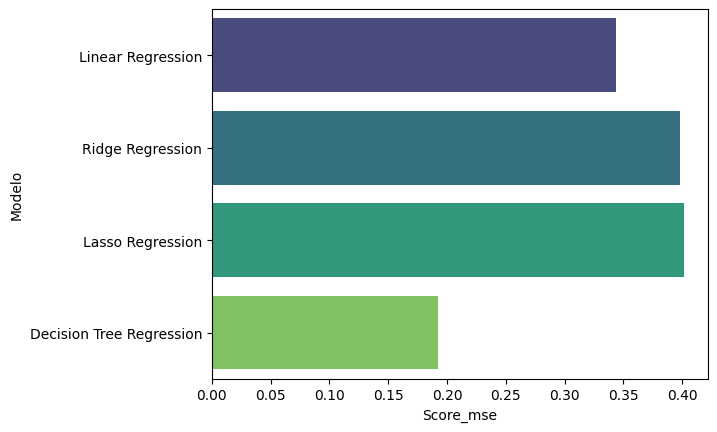

In [37]:
sns.barplot(x='Score_mse', y='Modelo', data=results_df, palette='viridis')

In [38]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5)

#### Entrenamiento final

In [39]:
best_model = grid_search.best_estimator_

# Entrenamiento final con todos los datos disponibles
best_model.fit(x_prep, y)

DecisionTreeRegressor(max_depth=5)